# Decision trees

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The problem</a></span><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Train-/-test-splitting" data-toc-modified-id="Train-/-test-splitting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train / test splitting</a></span></li><li><span><a href="#Paréntesis:-build-a-linear-regression" data-toc-modified-id="Paréntesis:-build-a-linear-regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Paréntesis: build a linear regression</a></span></li></ul></li><li><span><a href="#Decision-trees" data-toc-modified-id="Decision-trees-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decision trees</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Simple-tree-(depth=1)" data-toc-modified-id="Simple-tree-(depth=1)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Simple tree (depth=1)</a></span></li><li><span><a href="#Bigger-tree-(depth=3)" data-toc-modified-id="Bigger-tree-(depth=3)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Bigger tree (depth=3)</a></span></li><li><span><a href="#Huge-tree-(depth=20)" data-toc-modified-id="Huge-tree-(depth=20)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Huge tree (depth=20)</a></span></li><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Overfitting</a></span></li><li><span><a href="#Other-hyperparameters" data-toc-modified-id="Other-hyperparameters-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Other hyperparameters</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Grid search</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Intro

A decision tree tries to predict the target variable using a logic like the following.

<img src="https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc" width=600>

Decision trees:
 * are used **both** for classification (previous example Fit/Unfit) and regression
 * involve stratifying (segmenting) the predictor space...
 * in an iterative manner
 * are given this name because splitting rules can be summarized in a tree

Decision trees:
 * are simple
 * are useful for interpretation
 * are not very powerful predictors but...
 * give rise to more complex models, like Random Forest or Gradient Boosted Trees algorithms

## The problem

Today we will be using a **white wine** dataset

Experts have rated several wines, whose physical properties are also given

In [3]:
df = pd.read_csv("../datasets/wine_quality.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Data exploration

In [5]:
# since column names have spaces
df.columns = [col.replace(" ", "_") for col in df.columns]

In [6]:
df.shape

(4898, 12)

In [7]:
df.sample(10, random_state=666)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
367,6.9,0.33,0.21,1.0,0.053,39.0,148.0,0.99270,3.12,0.45,9.4,6
1939,6.8,0.31,0.32,7.6,0.052,35.0,143.0,0.99590,3.14,0.38,9.0,5
3475,6.2,0.36,0.45,10.4,0.060,22.0,184.0,0.99711,3.31,0.56,9.8,6
4630,5.7,0.25,0.32,12.2,0.041,43.0,127.0,0.99524,3.23,0.53,10.4,7
209,6.1,0.40,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.5,6
4263,7.0,0.55,0.05,8.0,0.036,19.0,164.0,0.99269,3.26,0.46,12.2,6
1057,7.2,0.51,0.24,10.0,0.093,35.0,197.0,0.99810,3.41,0.47,9.0,5
3053,7.6,0.17,0.36,4.5,0.042,26.0,102.0,0.99427,3.09,0.47,9.5,5
2217,8.1,0.25,0.38,3.8,0.051,18.0,129.0,0.99280,3.21,0.38,11.5,6
1794,6.6,0.37,0.24,2.0,0.064,23.0,120.0,0.99460,3.32,0.54,9.4,5


We want to:
 * build a **supervised** learning model
 * which is a **regression** model (predict quantitative feature)
 * that tries to predict wine `quality` from its physical properties (so that we do not anymore need experts' advice)

<AxesSubplot:xlabel='quality', ylabel='count'>

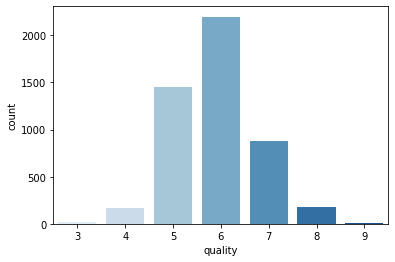

In [32]:
sns.countplot(x=df.quality, palette="Blues")

In [37]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [12]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
df.corr()["quality"].sort_values()

density                -0.307123
chlorides              -0.209934
volatile_acidity       -0.194723
total_sulfur_dioxide   -0.174737
fixed_acidity          -0.113663
residual_sugar         -0.097577
citric_acid            -0.009209
free_sulfur_dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

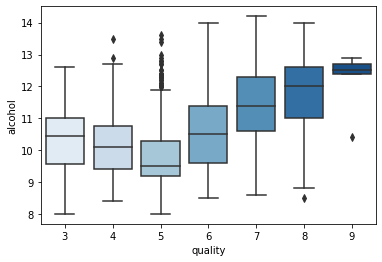

In [36]:
sns.boxplot(x=df.quality, y=df.alcohol, palette="Blues")

In [ ]:
# get median alcohol of 3s, 4s, 5s, 6s, 7s, 8s, 9s

In [50]:
df.groupby("quality").alcohol.median().sort_index()

quality
3    10.45
4    10.10
5     9.50
6    10.50
7    11.40
8    12.00
9    12.50
Name: alcohol, dtype: float64

<AxesSubplot:xlabel='fixed_acidity', ylabel='volatile_acidity'>

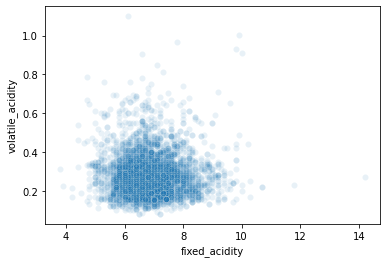

In [58]:
sns.scatterplot(x=df.fixed_acidity, y=df.volatile_acidity, alpha=0.1)

In [57]:
df.corr().loc["fixed_acidity", "volatile_acidity"]

-0.022697290146647224

### Train / test splitting

In [59]:
# train test split
from sklearn.model_selection import train_test_split

In [60]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
df.shape

(4898, 12)

In [62]:
X = df.drop("quality", axis=1)

In [63]:
y = df.quality

In [64]:
X.shape

(4898, 11)

In [65]:
y.shape

(4898,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [68]:
X_train.shape

(3918, 11)

In [69]:
X_test.shape

(980, 11)

In [70]:
y_train.value_counts()

6    1757
5    1161
7     718
8     142
4     122
3      14
9       4
Name: quality, dtype: int64

In [ ]:
y_test.value_counts()

In [71]:
y_train.shape

(3918,)

In [72]:
y_test.shape

(980,)

### Paréntesis: build a linear regression

1. Compro en la tienda una linear regression.

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lin = LinearRegression()

2. La entreno con el chorro de 3918 vinos de train

In [77]:
lin.fit(
    X=X_train, 
    y=y_train
)
# encontrar los parámetros beta_0, ... beta_n

LinearRegression()

In [78]:
lin.intercept_

146.15905034934443

In [81]:
pd.Series(lin.coef_, index=X.columns)

fixed_acidity             0.060971
volatile_acidity         -1.867264
citric_acid              -0.002781
residual_sugar            0.082284
chlorides                -0.329358
free_sulfur_dioxide       0.002196
total_sulfur_dioxide      0.000366
density                -146.392401
pH                        0.691896
sulphates                 0.626131
alcohol                   0.208952
dtype: float64

3. Cojo un vino nuevo. Cómo se predice su quality?  
La prediccion de un vino nuevo será beta_0 + beta_1 * fixed_acidity + beta_2 * volatile... + ...

In [82]:
X_test[:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
367,6.9,0.33,0.21,1.0,0.053,39.0,148.0,0.99270,3.12,0.45,9.4
1939,6.8,0.31,0.32,7.6,0.052,35.0,143.0,0.99590,3.14,0.38,9.0
3475,6.2,0.36,0.45,10.4,0.060,22.0,184.0,0.99711,3.31,0.56,9.8
4630,5.7,0.25,0.32,12.2,0.041,43.0,127.0,0.99524,3.23,0.53,10.4
209,6.1,0.40,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.5


In [83]:
lin.predict(X_test[:5]).round(2)

array([5.25, 5.23, 5.53, 6.21, 5.28])

In [84]:
y_test[:5]

367     6
1939    5
3475    6
4630    7
209     6
Name: quality, dtype: int64

In [85]:
from sklearn.metrics import mean_squared_error

In [85]:
from sklearn.metrics import 

In [99]:
# train error (MSE)
mean_squared_error(y_train, lin.predict(X_train)).round(3)

0.56

In [100]:
# test error (MSE)
mean_squared_error(y_test, lin.predict(X_test)).round(3)

0.579

Error on test is usually higher

## Decision trees

We will do train test splitting for correct asessment of model performance

We will use MSE metric: $$MSE=\frac{1}{N}\sum(y - \hat{y})^2$$

In [92]:
from sklearn.metrics import mean_squared_error

We will:
 * try several models and...
 * keep the one with the **least** MSE on **test set** (also called test error)
 * anyways, we will always show training error too

### Baseline model

The baseline model predicts the mean quality for every wine

In [93]:
baseline = y_train.mean()

In [94]:
baseline

5.8894844308320575

MSE can be manually computed

Train error

In [98]:
((y_train - baseline) ** 2).mean()

0.7782406223967026

Test error

In [101]:
((y_test - baseline) ** 2).mean()

0.8086727340637989

Test error is, as expected, bigger than train error

### Simple tree (depth=1)

Lets first fit a Tree, then interpret it

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
model = DecisionTreeRegressor(max_depth=1, random_state=666)

In [159]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=666)

Lets see how this model predicts the first 5 wines

In [160]:
# real values
y_train[:5]

4585    6
4025    6
3185    6
3304    7
506     5
Name: quality, dtype: int64

In [161]:
# predicted values
model.predict(X_train[:5].values).round(2)

array([6.35, 6.35, 6.35, 6.35, 5.61])

Train error

In [162]:
def f(a, b):
    return a * b

In [163]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
).round(3)

0.651

Test error

In [164]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
).round(3)

0.686

In [165]:
from sklearn.tree import plot_tree

In [166]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [167]:
y_train.mean()

5.8894844308320575

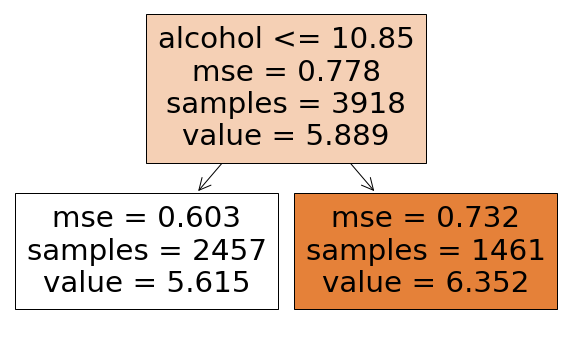

In [168]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [169]:
mean_squared_error(y_train, model.predict(X_train)).round(3)

0.651

This is the weighted mean of the leaf's MSEs

In [170]:
model.predict(X_test[5:10]).round(2)

array([6.35, 5.61, 5.61, 6.35, 5.61])

Some important questions for deep understanding:
 1. while training, why did the DecisionTree choose `alcohol` and $10.85$ ?

I will do the intestines of decision tree for pair (feature, cut) of (residual_sugar, 5)

Imagine we chose `residual_sugar` and value 5

In [127]:
group1 = X_train[X_train.residual_sugar <= 5].copy()
group2 = X_train[X_train.residual_sugar > 5].copy()

In [128]:
group1.shape

(1955, 11)

In [129]:
group2.shape

(1963, 11)

In [130]:
group1_mean = y_train[group1.index].mean()

In [131]:
group1_mean

5.98005115089514

In [132]:
group2_mean = y_train[group2.index].mean()

In [133]:
group2_mean

5.799286805909323

In [134]:
mse = (
    ((y_train[group1.index] - group1_mean) ** 2).sum() +
    ((y_train[group2.index] - group2_mean) ** 2).sum()
) / X_train.shape[0]

In [135]:
mse

0.7700717193499703

Shitty improvement over baseline model, and much worse than alcohol 10.85, optimal feature-threshold pair

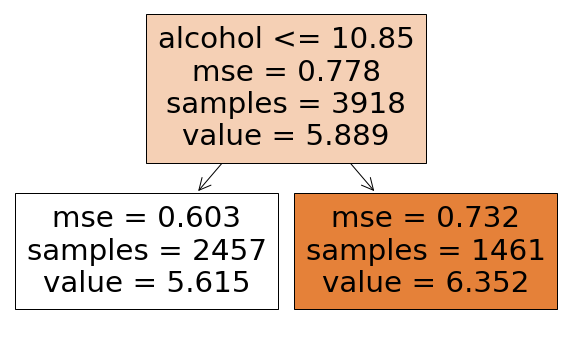

In [136]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

2. what is the meaning of `mse`: the mean squared error in the bucket: the one you would get if every wine in that bucket was given the mean of the bucket. This is, a baseline model in the bucket.
3. what is the meaning of `value`: the mean quality of wines in that bucket. The value that will be predicted for every new wine ending in that tree leaf

4. while testing (predicting a new instance), how does the tree operate? It goes through a unique path. When this path ends, the value in that leaf is the prediction

### Bigger tree (depth=3)

In [171]:
model = DecisionTreeRegressor(max_depth=3, random_state=666)

In [172]:
%%time
model.fit(X_train, y_train)

CPU times: user 12.5 ms, sys: 51 µs, total: 12.5 ms
Wall time: 11.1 ms


DecisionTreeRegressor(max_depth=3, random_state=666)

In [173]:
# real values
y_train[:15]

4585    6
4025    6
3185    6
3304    7
506     5
4133    6
4173    5
1783    6
2331    5
1811    5
1348    8
2066    5
1074    6
988     5
2260    5
Name: quality, dtype: int64

In [174]:
# predicted values
model.predict(X_train[:15].values).round(2)

array([6.61, 6.61, 6.21, 6.61, 5.03, 5.46, 5.46, 5.03, 5.46, 5.03, 6.21,
       5.46, 5.46, 6.04, 5.46])

Train error

In [175]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
).round(3)

0.56

In [176]:
# real values
y_test[:10]

367     6
1939    5
3475    6
4630    7
209     6
4263    6
1057    5
3053    5
2217    6
1794    5
Name: quality, dtype: int64

In [177]:
# predicted values
model.predict(X_test[:10].values).round(2)

array([5.46, 5.46, 5.46, 5.46, 5.46, 6.61, 5.46, 6.04, 6.21, 5.46])

Test error

In [178]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
).round(3)

0.583

In [179]:
df.corr()["quality"].sort_values()

density                -0.307123
chlorides              -0.209934
volatile_acidity       -0.194723
total_sulfur_dioxide   -0.174737
fixed_acidity          -0.113663
residual_sugar         -0.097577
citric_acid            -0.009209
free_sulfur_dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

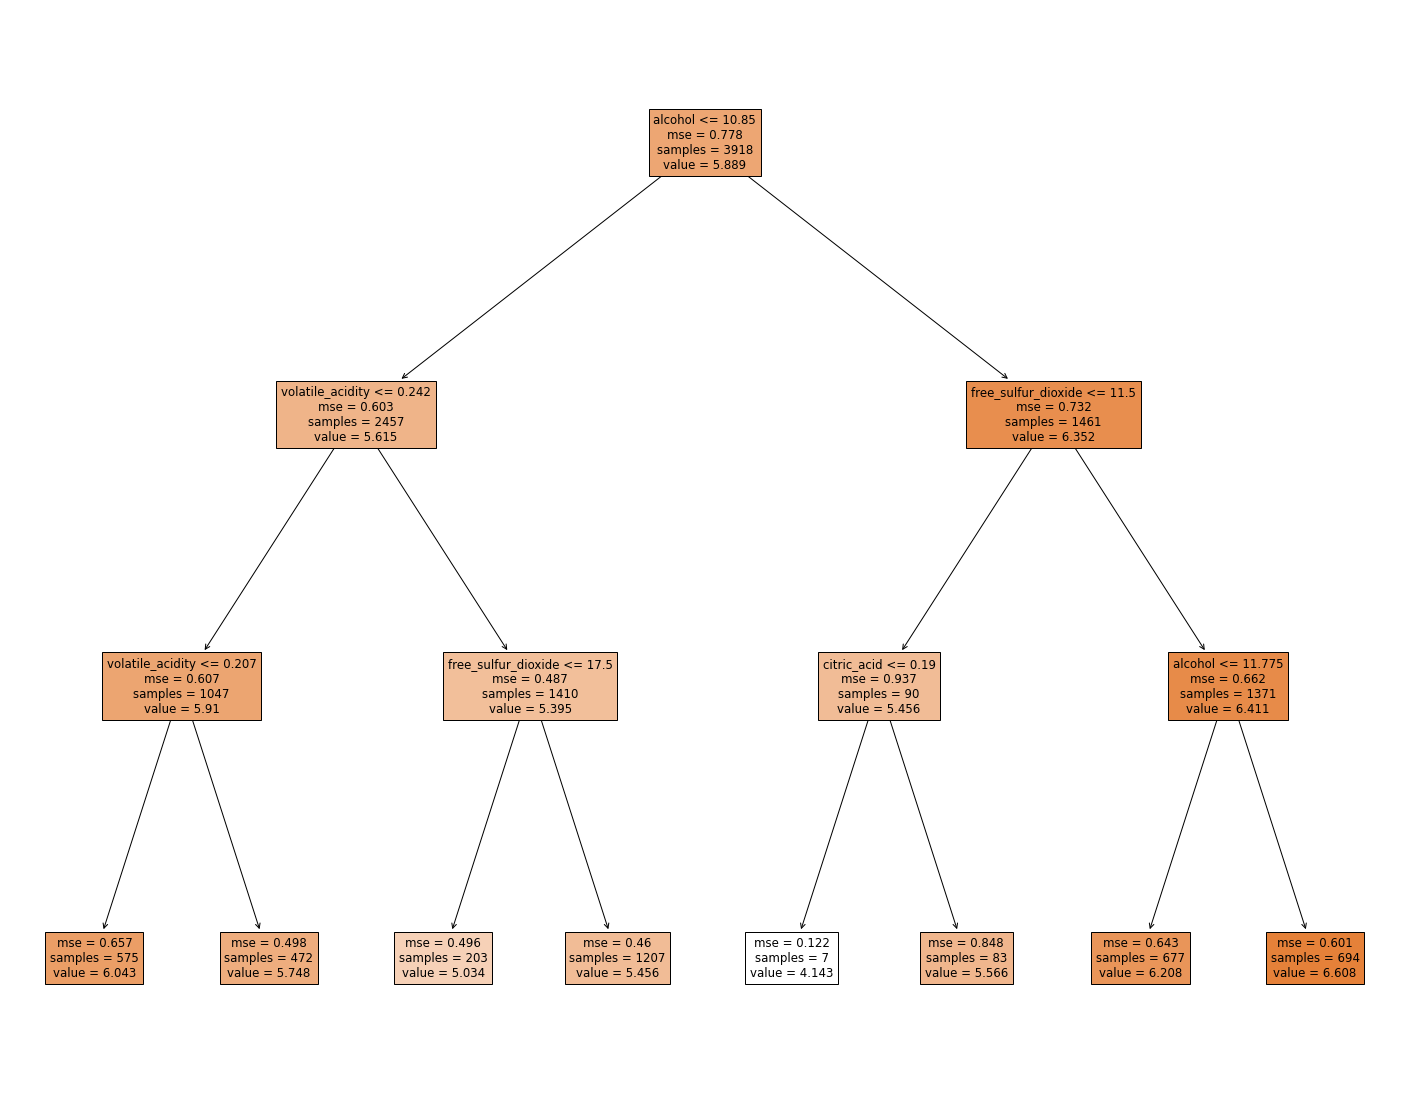

In [180]:
fig = plt.figure(figsize=(25, 20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [144]:
fig.savefig("depth3.svg")

### Huge tree (depth=20)

In [181]:
model = DecisionTreeRegressor(max_depth=20, random_state=666)

In [182]:
%%time
model.fit(X_train, y_train)

CPU times: user 45.2 ms, sys: 73 µs, total: 45.3 ms
Wall time: 43.9 ms


DecisionTreeRegressor(max_depth=20, random_state=666)

Train error

In [183]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.004910610155920119

Test error

In [184]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.7107584281201887

### Overfitting

Lets see how training and test error changes with `max_depth`

In [185]:
results = []

for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth, random_state=666)
    model.fit(X_train, y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [186]:
results_df = pd.DataFrame(results)

In [187]:
results_df

,model,depth,train_error,test_error
0,"DecisionTreeRegressor(max_depth=1, random_stat...",1,0.651140,0.685560
1,"DecisionTreeRegressor(max_depth=2, random_stat...",2,0.590774,0.615895
2,"DecisionTreeRegressor(max_depth=3, random_stat...",3,0.559806,0.583194
3,"DecisionTreeRegressor(max_depth=4, random_stat...",4,0.526841,0.552649
4,"DecisionTreeRegressor(max_depth=5, random_stat...",5,0.491170,0.550328
5,"DecisionTreeRegressor(max_depth=6, random_stat...",6,0.452954,0.552189
6,"DecisionTreeRegressor(max_depth=7, random_stat...",7,0.412669,0.556606
7,"DecisionTreeRegressor(max_depth=8, random_stat...",8,0.373470,0.570726
8,"DecisionTreeRegressor(max_depth=9, random_stat...",9,0.328613,0.605770
9,"DecisionTreeRegressor(max_depth=10, random_sta...",10,0.277888,0.636420


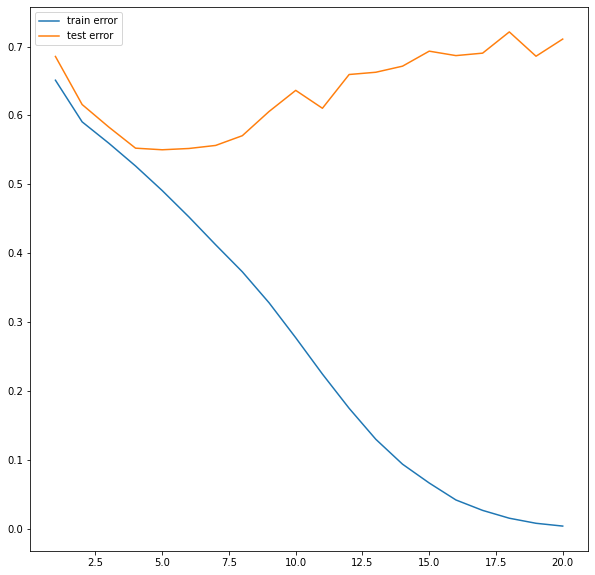

In [188]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

We can see how, when `max_depth` increases above ~6:
 * training error decresases (more precise on training samples)
 * test error increases (model is memorizing training set and not generalizing very well)

This is the famous overfitting! And this is why **test error** is the one you should look at!

In [189]:
X.shape

(4898, 11)

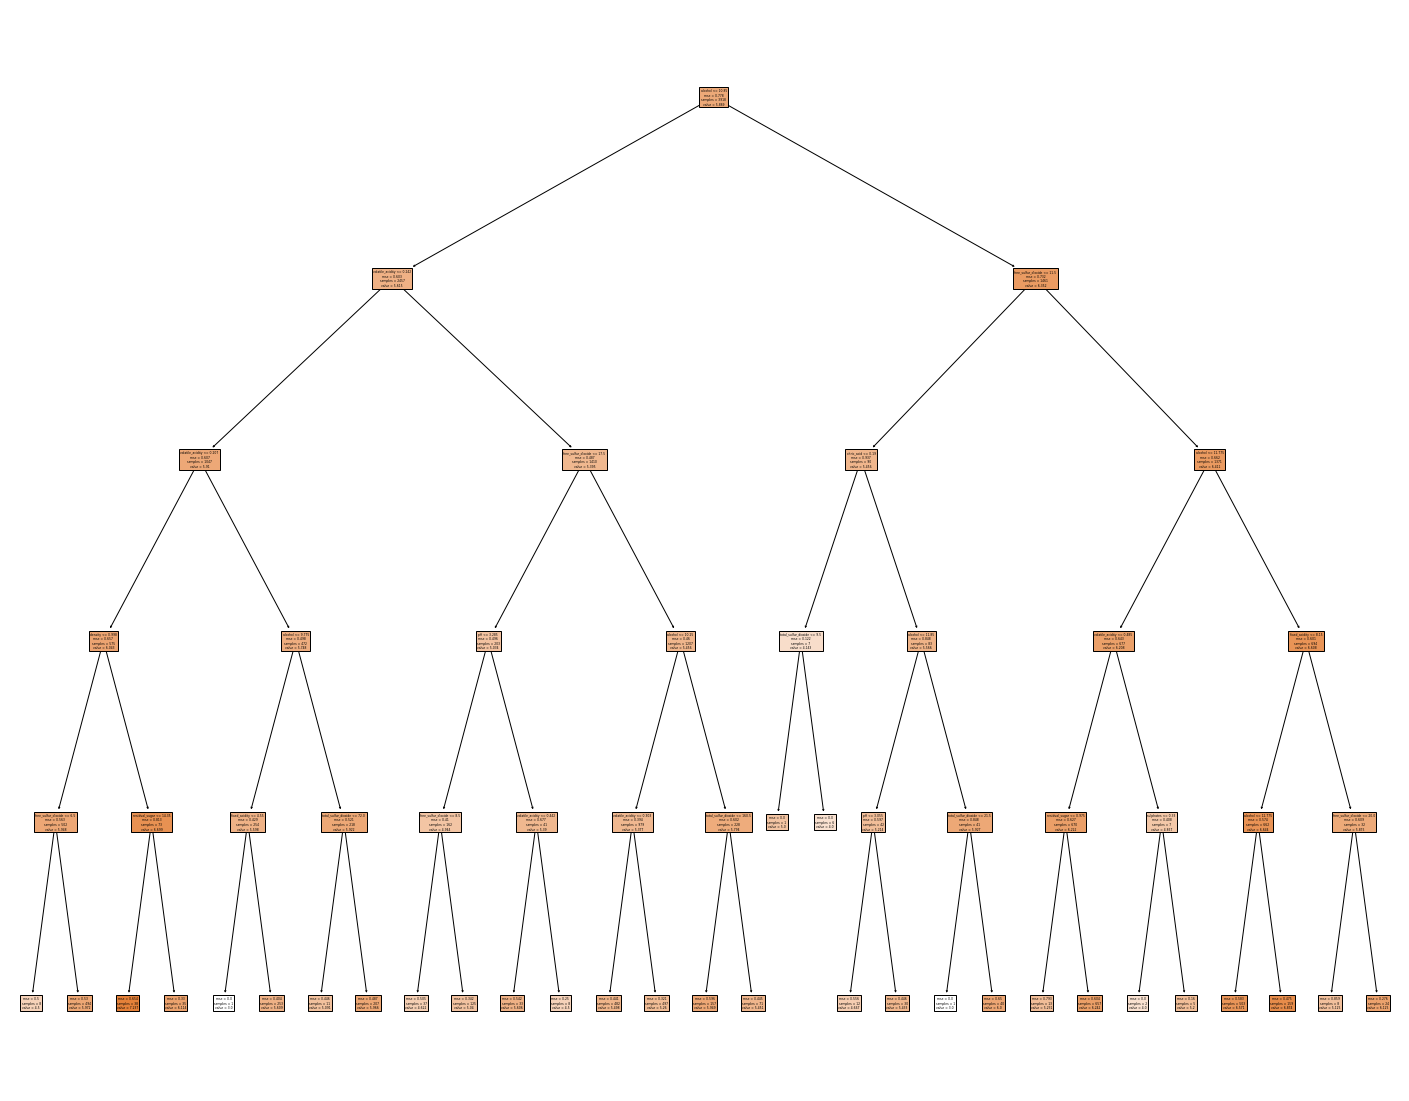

In [190]:
fig = plt.figure(figsize=(25,20))
plot_tree(results_df.loc[4].model, feature_names=df.columns[:-1], filled=True);

In [193]:
fig.savefig("depth5.svg")

### Other hyperparameters

As well as `max_depth`, there are other **hyperparameters** that let us build different trees' architectures of the family DecisionTreeRegressor:
 * `min_samples_split`: the minimum number of samples required to split an internal node  
 * `max_features`: the number of features to consider when looking for the best split  

In [209]:
model = DecisionTreeRegressor(max_depth=6, min_samples_split=30, random_state=666)

In [210]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=30, random_state=666)

In [211]:
print(f"train error: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"test error: {mean_squared_error(y_test, model.predict(X_test))}")

train error: 0.4602253101447177
test error: 0.5460081585875945


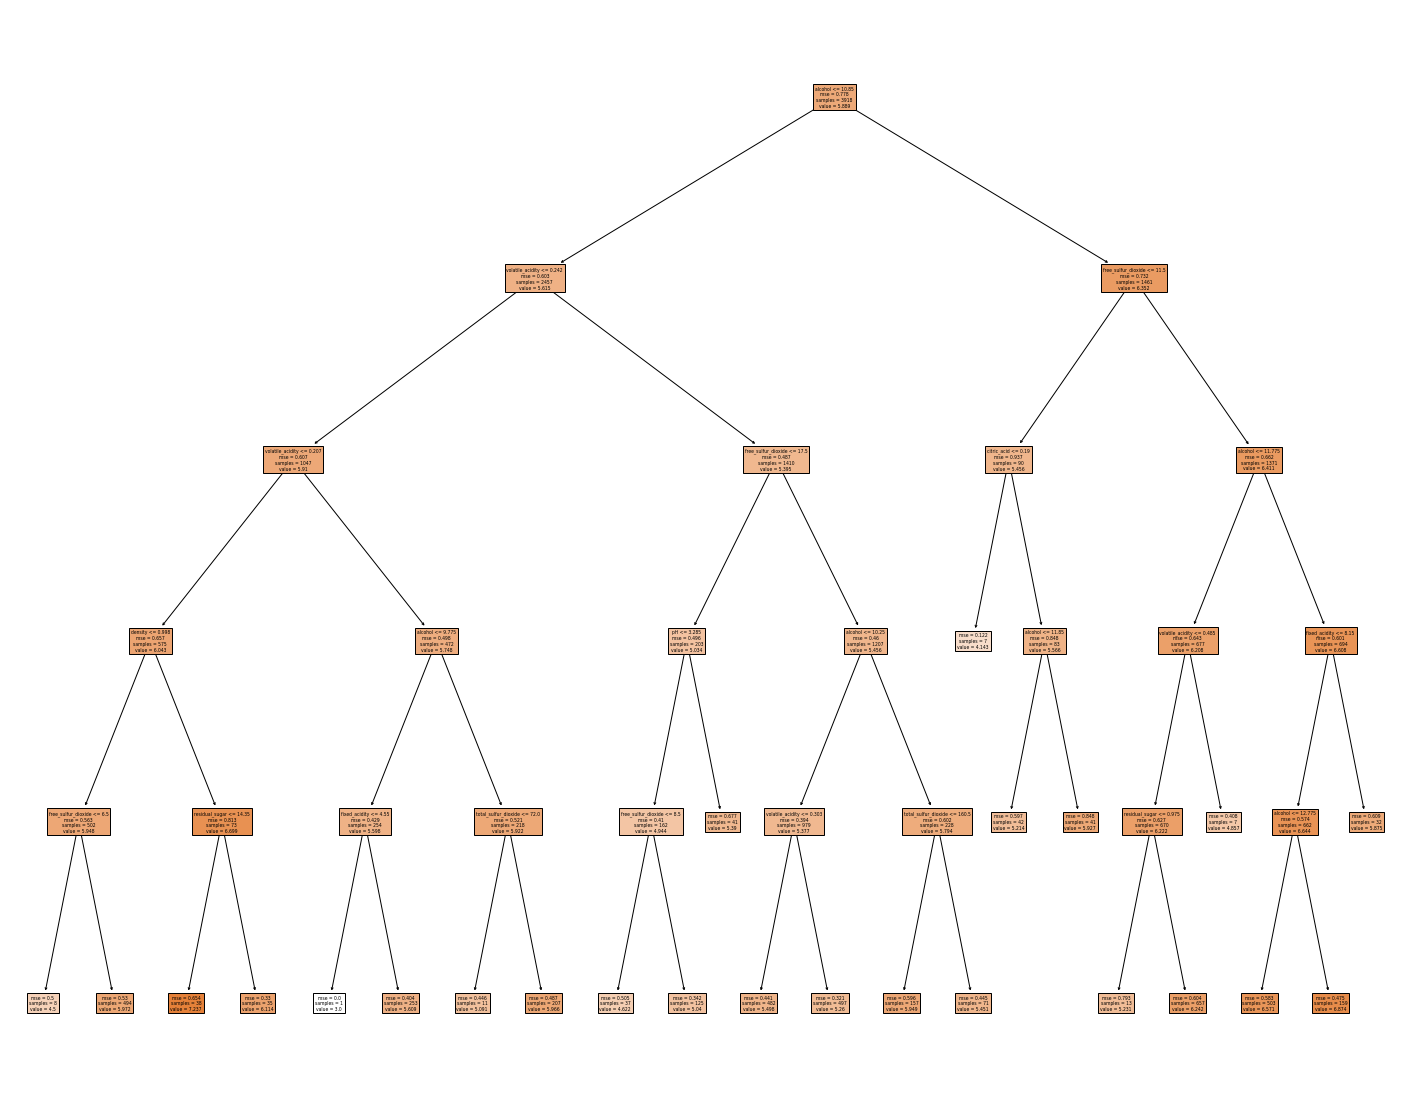

In [202]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [198]:
fig.savefig("depth5-maxsplit50.svg")

### Grid search

Lets find the *best* combination of hyperparameters, i.e. the ones yielding the least test error, among a prescribed grid of values for each hyperparameter

In [213]:
from sklearn.model_selection import GridSearchCV

In [225]:
# from sklearn.model_selection import RandomizedSearchCV

In [216]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [5, 6, 7],
        "min_samples_split": [30, 50, 100],
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

It will try 3 * 3 = 9 options

In [217]:
%%time
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=5, min_samples_split=30 ...............................
[CV]  max_depth=5, min_samples_split=30, score=(train=-0.487, test=-0.544), total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV]  max_depth=5, min_samples_split=30, score=(train=-0.496, test=-0.557), total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV]  max_depth=5, min_samples_split=30, score=(train=-0.491, test=-0.563), total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV]  max_depth=5, min_samples_split=30, score=(train=-0.487, test=-0.559), total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV]  max_depth=5, min_samples_split=30, score=(train=-0.512, test=-0.554), total=   0.0s
[CV] max_depth=5, min_samples_split=50 ...............................
[CV]  max_depth=5, min_samples_split=50, score=(train=-0.490, te

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, min_samples_split=50, score=(train=-0.513, test=-0.552), total=   0.0s
[CV] max_depth=5, min_samples_split=100 ..............................
[CV]  max_depth=5, min_samples_split=100, score=(train=-0.502, test=-0.547), total=   0.0s
[CV] max_depth=5, min_samples_split=100 ..............................
[CV]  max_depth=5, min_samples_split=100, score=(train=-0.510, test=-0.554), total=   0.0s
[CV] max_depth=5, min_samples_split=100 ..............................
[CV]  max_depth=5, min_samples_split=100, score=(train=-0.507, test=-0.561), total=   0.0s
[CV] max_depth=5, min_samples_split=100 ..............................
[CV]  max_depth=5, min_samples_split=100, score=(train=-0.500, test=-0.567), total=   0.0s
[CV] max_depth=5, min_samples_split=100 ..............................
[CV]  max_depth=5, min_samples_split=100, score=(train=-0.525, test=-0.547), total=   0.0s
[CV] max_depth=6, min_samples_split=30 ...............................
[CV]  max_depth=6, min_sample

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

Lets sort all trees by their performance:

In [220]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [223]:
grid_search_results.sort_values("mean_test_score", ascending=False)

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
7,7,50,-0.546606,-0.443990
4,6,50,-0.547678,-0.468542
6,7,30,-0.550742,-0.431426
3,6,30,-0.550764,-0.461284
1,5,50,-0.552534,-0.497619
5,6,100,-0.553259,-0.486066
2,5,100,-0.555153,-0.508877
0,5,30,-0.555597,-0.494601
8,7,100,-0.555761,-0.467473


We can access the best estimator of the grid search in this way

In [226]:
best_tree = gs.best_estimator_

In [227]:
best_tree

DecisionTreeRegressor(max_depth=7, min_samples_split=50)

In [228]:
mean_squared_error(best_tree.predict(X_train), y_train)

0.4510479395496303

In [229]:
mean_squared_error(best_tree.predict(X_test), y_test)

0.5434778981486602

## Feature importance

How important were features for predicting `quality`? DecisionTreeRegressor has an attribute `feature_importances_`

In [231]:
best_tree

DecisionTreeRegressor(max_depth=7, min_samples_split=50)

In [232]:
feature_imp = pd.Series(best_tree.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)

In [233]:
feature_imp

alcohol                 0.488041
volatile_acidity        0.168110
free_sulfur_dioxide     0.137240
residual_sugar          0.038988
fixed_acidity           0.038091
density                 0.037384
pH                      0.025779
sulphates               0.023257
total_sulfur_dioxide    0.020465
chlorides               0.012442
citric_acid             0.010203
dtype: float64

<AxesSubplot:>

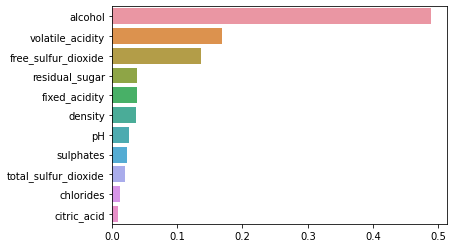

In [234]:
sns.barplot(x=feature_imp.values, y=feature_imp.index)

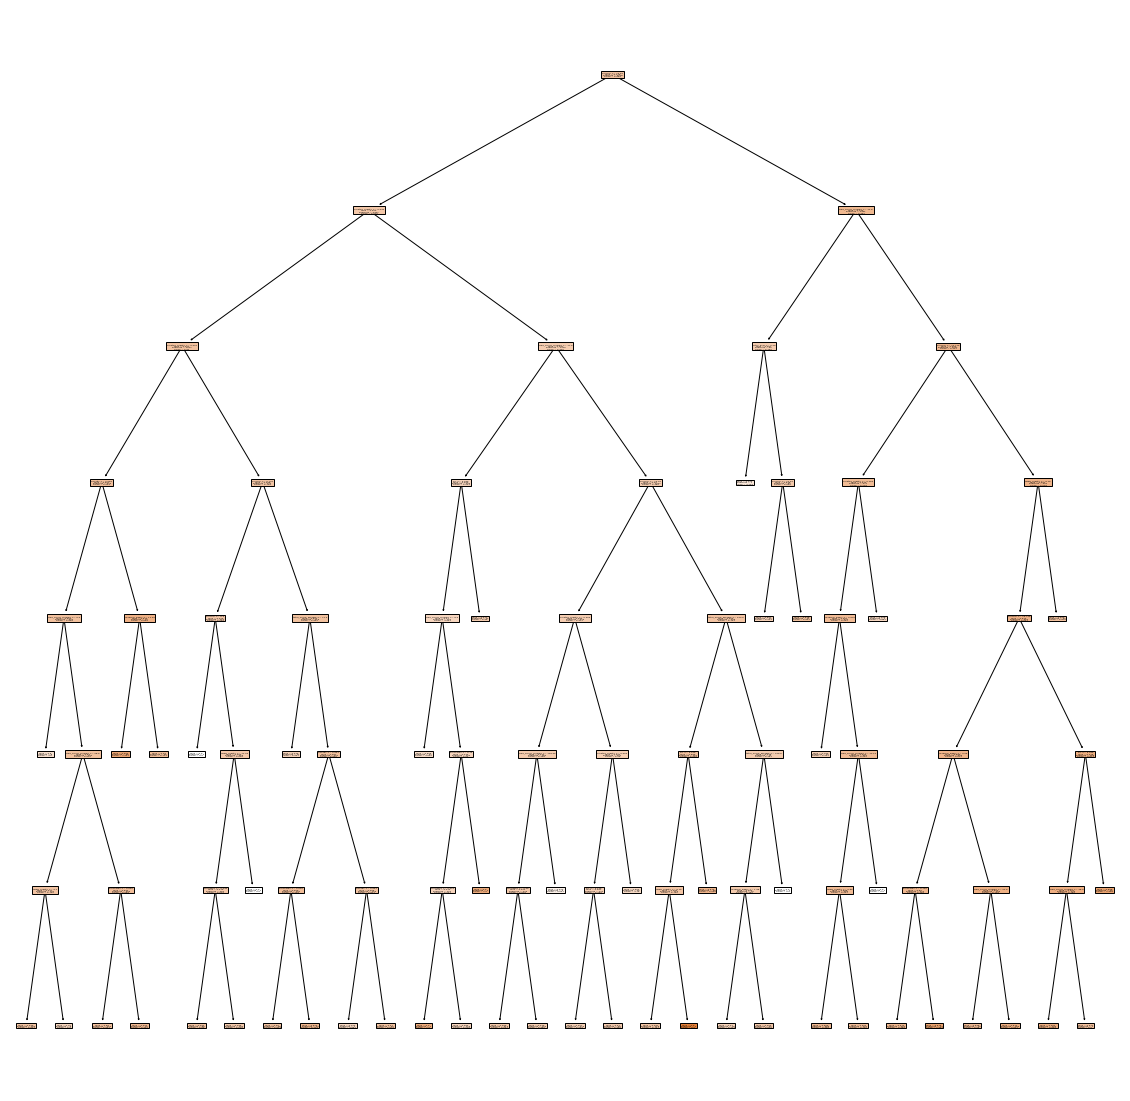

In [235]:
fig = plt.figure(figsize=(20, 20))
plot_tree(best_tree, feature_names=df.columns[:-1], filled=True);

Save in format `.svg` for non-pixeled image!!

In [236]:
fig.savefig("decision_tree.svg", facecolor="white")

In [240]:
my_wine = X.loc[666].to_frame().T

In [244]:
my_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
666,6.8,0.22,0.37,1.7,0.036,38.0,195.0,0.9908,3.35,0.72,12.5


In [242]:
best_tree.predict(my_wine)[0]

6.388461538461539

In [245]:
my_wine.citric_acid += 0.2

In [246]:
my_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
666,6.8,0.22,0.57,1.7,0.036,38.0,195.0,0.9908,3.35,0.72,12.5


In [247]:
best_tree.predict(my_wine)[0]

6.388461538461539

In [248]:
my_wine.alcohol += 2

In [249]:
my_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
666,6.8,0.22,0.57,1.7,0.036,38.0,195.0,0.9908,3.35,0.72,14.5


In [250]:
best_tree.predict(my_wine)[0]

7.3076923076923075

## Summary

 * Decision trees are useful for regression (`DecisionTreeRegressor`) and classification (`DecisionTreeClassifier`)
 * Their behavior is quite intuitive
 * Their behavior is interpretable and explainable

 * Decision trees overfit when `max_depth` becomes very big (obvious, individual leaves at the end)
 * Prevent overfitting (always, not only in tree based methods) by looking at test error and train error

 * One decision tree is often not a very powerful ML algorithm
 * Decision trees are the building blocks of more advanced and superpowerful algorithms